# Splitting and training

Before running this script, you must create the following folders in the directory where your Python notebook is located:
1. ./dataset/train -- folder for saving data for traing after splitting your original dataset
2. ./dataset/test -- folder for test data 
3. ./dataset/val -- folder for validation data
4. ./output -- folder where you are going to save your trained model

In [1]:
import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [2]:
DATA_SRC = "./preproc" #Path to transformed data

In [3]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [4]:
display(files)

['10_minus.csv',
 '10_original.csv',
 '10_plus.csv',
 '1_minus.csv',
 '1_original.csv',
 '1_plus.csv',
 '2_minus.csv',
 '2_original.csv',
 '2_plus.csv',
 '3_minus.csv',
 '3_original.csv',
 '3_plus.csv',
 '4_minus.csv',
 '4_original.csv',
 '4_plus.csv',
 '5_minus.csv',
 '5_original.csv',
 '5_plus.csv',
 '6_minus.csv',
 '6_original.csv',
 '6_plus.csv',
 '7_minus.csv',
 '7_original.csv',
 '7_plus.csv',
 '8_minus.csv',
 '8_original.csv',
 '8_plus.csv',
 '9_minus.csv',
 '9_original.csv',
 '9_plus.csv']

In [5]:
#path to TRAIN, TEST and VAL folders where your split data will be saved.
#You can directly enter this information in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [6]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER)

100%|██████████| 30/30 [00:00<00:00, 512.76it/s]


In [ ]:
def count_files(dir_path):
    count = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    print('File count:', count)

In [ ]:
print("Train data:")
count_files(TRAIN_FOLDER)
print("Test data:")
count_files(TEST_FOLDER)
print("Validation data:")
count_files(VAL_FOLDER)

# TRAINING

# Special note for mac os users: 

When creating folders with mac operating systems, hidden .DS_Store files may be created. The user must delete these files before starting training from each folder. The best way is to go into each folder individually and run the command:

!rm -f .DS_Store

Important note: Deleting files using the "delete" directly in the folders does not remove hidden files.

In [7]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

In [8]:
BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [9]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

In [10]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
device

device(type='cpu')

In [11]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [12]:
#function for training the data
# numbers that we give in this example are: 
#1 - number of training runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 3000, 2000, mseMetric, maeMetric, device)

100%|██████████| 3000/3000 [03:09<00:00, 15.81it/s]


In [13]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [14]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [15]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'  

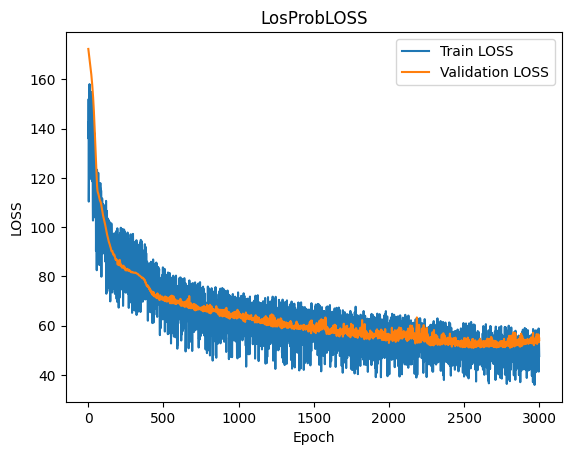

In [16]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [17]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'  
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'  

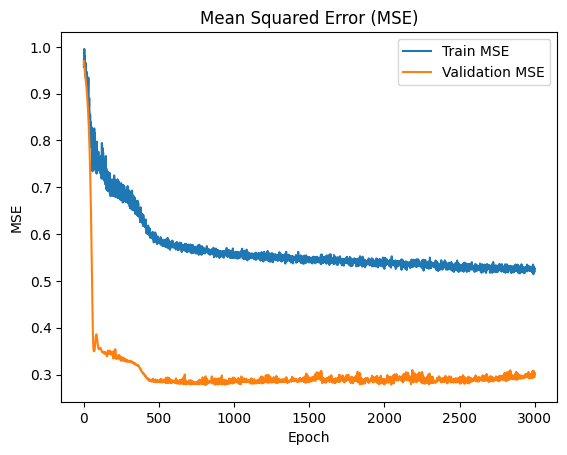

In [18]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [19]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'  
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'  

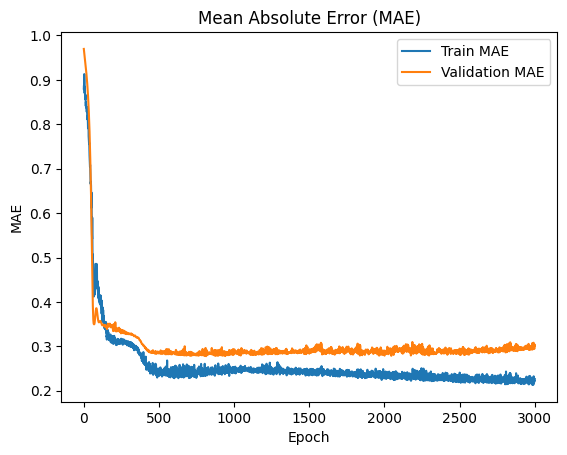

In [20]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [21]:
save=st.save_model(model, MODEL_PATH)#saving the trained model